## <center> Hate Speech Detection In Roman Urdu Using Machine Learning

##### Importing Necassary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn import preprocessing
import re

##### Reading Data From 'HS-Comments.xlsx' Using Python Pandas Library 

In [3]:
data_set = pd.read_excel('HS-Comments.xlsx')
data_set.head()

,Comments,Labels
0,bubble ki baat kon kar rha hai dekho. aik male...,NHS
1,teri chut me sabhi bhaiyo ka lund reply de randi,HS
2,teri maa k aashiq hai hum pyar se tum hume abb...,HS
3,rt : 2 din randi rona krna hai ab,HS
4,arre aahiste bol.... baap log sun lenge,HS


## PreProcessing 

##### Removing Duplicates from data sets

In [6]:
duplicate_count = data_set.duplicated(subset="Comments").sum()
print(f"Number of duplicate comments: {duplicate_count}")

data_set = data_set.drop_duplicates(subset="Comments" , keep = False)

Number of duplicate comments: 1


##### Identifying Null Values 

In [8]:
print("Null values in each column:")
print(data_set.isnull().sum())

data_set = data_set.dropna()

print("\nRows left after removing nulls:", data_set.shape[0])

Null values in each column:
Comments    0
Labels      0
dtype: int64

Rows left after removing nulls: 9023


##### Removing Stopwords

In [10]:
from nltk.corpus import stopwords as eng_stopwords

def load_roman_urdu_stopwords(file_path="stopwords.txt"):
    with open(file_path, "r", encoding="utf-8") as file:
        ru_stopwords = set(word.strip() for word in file.readlines())
    return ru_stopwords

def clean_roman_urdu(text, ru_stopwords, en_stopwords):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)      
    text = re.sub(r'\s+', ' ', text).strip()  
    words = text.split()
    filtered_words = [word for word in words if word not in ru_stopwords and word not in en_stopwords]
    return " ".join(filtered_words)

roman_urdu_stopwords = load_roman_urdu_stopwords()
english_stopwords = set(eng_stopwords.words("english"))

data_set['Comments'] = data_set['Comments'].apply(lambda x: clean_roman_urdu(x, roman_urdu_stopwords, english_stopwords))

data_set


,Comments,Labels
0,bubble baat aik male feminist bhai baat system...,NHS
1,chut bhaiyo lund reply randi,HS
2,maa aashiq pyar hume abbu kahoge bete verna ma...,HS
3,din randi rona,HS
4,arre aahiste baap log lenge,HS
...,...,...
9020,hal aak din media rona mithiye riyasat madina ...,NHS
9021,mujhy kiya pata nhi rehtiek bar bus,NHS
9022,masha allah khan ads goverments banwanay chlanay,NHS
9023,kehny maa baap kou chordun baat maa chod doun,HS


### Feature Extraction & Train & Test Split

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=5000) 
X = vectorizer.fit_transform(data_set['Comments'])  
y = data_set['Labels']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.36,random_state=42)

print("Feature Extraction Complete ✅")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Feature Extraction Complete ✅
Training Samples: 6316
Testing Samples: 2707


### Machine learning Techniques

##### Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=1)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=1)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=1)

results_dt = pd.DataFrame(
    [["Decision Tree Classifier", accuracy_dt, precision_dt, recall_dt, f1_dt]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
) 

print("\n🔹 Decision Tree Classifier Performance:\n")
print(results_dt)



🔹 Decision Tree Classifier Performance:

                      Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree Classifier  0.847802   0.847811  0.847802  0.847777


##### Random Forest Tree

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=60, random_state=42)


random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)

results_rf = pd.DataFrame(
    [["Random Forest Classifier", accuracy_rf, precision_rf, recall_rf, f1_rf]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

print("\n🔹 Random Forest Classifier Performance:\n")
print(results_rf)


🔹 Random Forest Classifier Performance:

                      Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest Classifier  0.878463   0.880954  0.878463  0.878383


##### Naïve Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB


naive_bayes = MultinomialNB()

naive_bayes.fit(X_train, y_train)

y_pred_nb = naive_bayes.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=1)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=1)

results_nb = pd.DataFrame(
    [["Naïve Bayes Classifier", accuracy_nb, precision_nb, recall_nb, f1_nb]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)

print("\n🔹 Naïve Bayes Classifier Performance:\n")
print(results_nb)



🔹 Naïve Bayes Classifier Performance:

                    Model  Accuracy  Precision    Recall  F1-Score
0  Naïve Bayes Classifier  0.816771   0.816778  0.816771  0.816774


### Confusion Matrix

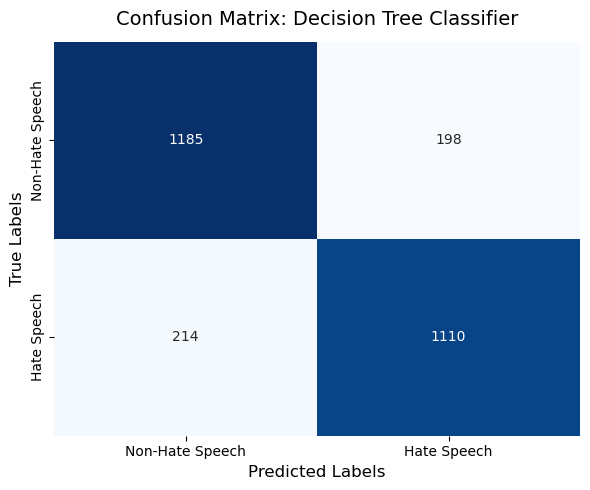

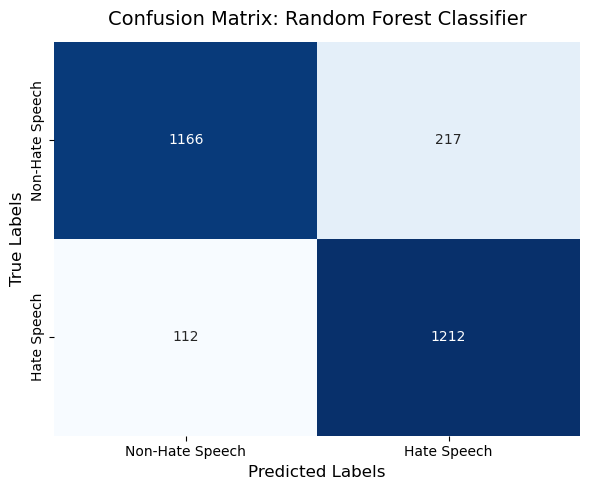

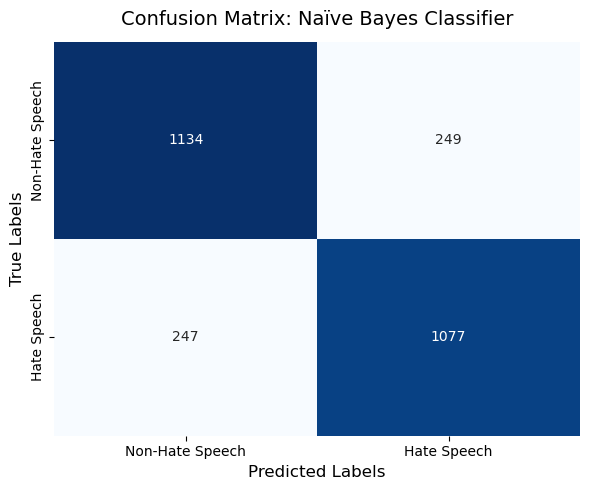

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues', cbar=False)
    
    ax.set_xlabel('Predicted Labels', fontsize= 12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title(f'Confusion Matrix: {model_name}', fontsize=14, pad=12)
    
    ax.xaxis.set_ticklabels(['Non-Hate Speech', 'Hate Speech'])
    ax.yaxis.set_ticklabels(['Non-Hate Speech', 'Hate Speech'])
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree Classifier")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes Classifier")

### Accuracy Evaluation

In [23]:
print(f"\n Accuracy of Decision Tree: {accuracy_dt * 100:.2f}%")
print(f" Accuracy of Random Forest: {accuracy_rf * 100:.2f}%")
print(f" Accuracy of Naïve Bayes: {accuracy_nb * 100:.2f}%")

if accuracy_dt > accuracy_rf and accuracy_dt > accuracy_nb:
    print("\n **Best Model for Toxic Comment Detection: Decision Tree**")
elif accuracy_rf > accuracy_dt and accuracy_rf > accuracy_nb:
    print("\n **Best Model for Toxic Comment Detection: Random Forest**")
else:
    print("\n **Best Model for Toxic Comment Detection: Naïve Bayes**")



 Accuracy of Decision Tree: 84.78%
 Accuracy of Random Forest: 87.85%
 Accuracy of Naïve Bayes: 81.68%

 **Best Model for Toxic Comment Detection: Random Forest**


In [24]:
import joblib

joblib.dump(decision_tree, "models/decision_tree_model.joblib")
joblib.dump(random_forest, "models/random_forest_model.joblib")
joblib.dump(naive_bayes, "models/naive_bayes_model.joblib")
joblib.dump(vectorizer, "models/vectorizer.joblib")

print("✅ Models and vectorizer saved using Joblib")



✅ Models and vectorizer saved using Joblib
